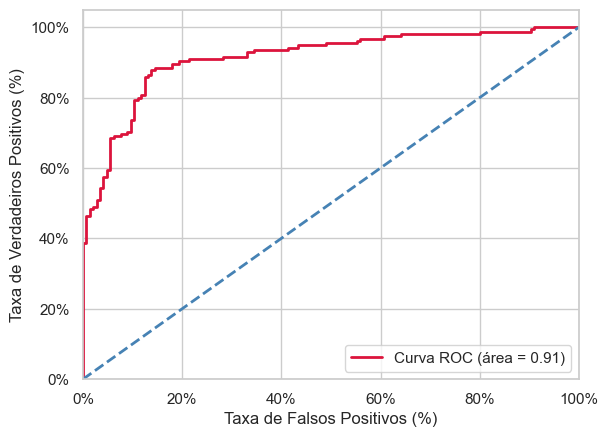

In [4]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Gerar um conjunto de dados de exemplo
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Prever as probabilidades no conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='crimson', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='steelblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (%)')
plt.ylabel('Taxa de Verdadeiros Positivos (%)')
plt.legend(loc="lower right")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()